# 승강기 검사 결과

```
한국승강기안전공단_승강기 검사 결과

한국승강기안전공단에서는 승강기 관련 종합정보전산망을 구축하여 승강기에 대한 종합정보와 사고 등의 각종 이력관리 및 승강기관련 각종 통계자료를 제공하고 있습니다.

https://www.data.go.kr/data/15112639/fileData.do
```

# 1. Data 확인

In [1]:
import pandas as pd

## Load Data

In [2]:
url = "https://raw.githubusercontent.com/sw1kwon/KESA/refs/heads/main/data/c_03.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,검사결과이력조회코드,검사일자,검사종류,검사차수,검사결과,검사기관,검사당시승강기구분,검사당시승강기형식,승강기세부형식,검사당시승강기종류,설치수시구분
0,4300001,2024-08-23,정기,1,합격,한국승강기안전공단 서울서부지사,엘리베이터,권상식,VVVF,승객용,NaN
1,8500001,2024-09-05,정기,1,조건부합격(1개월/서류검사),(재)승강기안전기술연구원 서울지원,엘리베이터,권상식,VVVF,화물용,NaN
2,8500001,2024-09-24,정기,2,조건후합격,(재)승강기안전기술연구원 서울지원,엘리베이터,권상식,VVVF,화물용,NaN
3,10000015,2024-12-13,정기,1,합격,한국승강기안전공단 서울동부지사,엘리베이터,권상식,VVVF,승객용,NaN
4,10000029,2024-08-06,정밀,1,합격,한국승강기안전공단 서울동부지사,엘리베이터,권상식,VVVF,승객용,NaN


## 데이터 구조 확인

In [4]:
df.shape

(634630, 11)

In [5]:
# 데이터 구조 파악
# object 문자형
# int/float 수치형
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634630 entries, 0 to 634629
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   검사결과이력조회코드  634630 non-null  int64 
 1   검사일자        634630 non-null  object
 2   검사종류        634630 non-null  object
 3   검사차수        634630 non-null  int64 
 4   검사결과        634630 non-null  object
 5   검사기관        634630 non-null  object
 6   검사당시승강기구분   634630 non-null  object
 7   검사당시승강기형식   634630 non-null  object
 8   승강기세부형식     608851 non-null  object
 9   검사당시승강기종류   634630 non-null  object
 10  설치수시구분      51038 non-null   object
dtypes: int64(2), object(9)
memory usage: 53.3+ MB


- '승강기세부형식', '설치수시구분'을 제외한 모든 변수에 Null 값이 없음
- '설치수시구분'은 Null 값이 많아보임

In [6]:
# 문자형(범주형) 데이터 확인
df.describe(include=['object']).T

,count,unique,top,freq
검사일자,634630,170,2024-09-11,6229
검사종류,634630,4,정기,512547
검사결과,634630,17,합격,241185
검사기관,634630,58,한국승강기안전공단 경기북부지사,25361
검사당시승강기구분,634630,7,엘리베이터,603263
검사당시승강기형식,634630,15,권상식,592885
승강기세부형식,608851,7,VVVF,591519
검사당시승강기종류,634630,35,승객용,219813
설치수시구분,51038,6,신규설치,21103


- 나중에 검사일자를 시계열 데이터 형식으로 바꿔서 분석 (필요 시)
- '검사당시승강기형식'과 '승강기세부형식'에 모르는 용어가 많을 것 같음

In [7]:
# 수치형 데이터 확인
df.describe(include=['int64','float64'])

,검사결과이력조회코드,검사차수
count,6.346300e+05,634630.000000
mean,4.213546e+07,1.282875
std,1.873299e+07,0.450397
min,4.300001e+06,1.000000
25%,3.050155e+07,1.000000
50%,4.400182e+07,1.000000
75%,5.600694e+07,2.000000
max,7.990011e+07,2.000000


In [8]:
# df.describe(include='number') # 동일 결과 코드

- 검사차수는 1차 또는 2차

# 2. EDA

## 1. (결측치) 각 column의 결측값 비율

In [9]:
# 각 column의 결측값 비율 계산
missing_ratio = df.isnull().mean()                  # 각 column의 결측값 비율 계산 (결측 개수 / 전체 row 수)
missing_ratio = missing_ratio.sort_values(ascending=False)  # 결측 비율이 높은 순서대로 정렬
missing_ratio = missing_ratio.reset_index()         # Series → DataFrame 변환 (인덱스 초기화)
missing_ratio.columns = ['Column', 'MissingRatio']
print(missing_ratio)

        Column  MissingRatio
0       설치수시구분      0.919578
1      승강기세부형식      0.040621
2   검사결과이력조회코드      0.000000
3         검사종류      0.000000
4         검사일자      0.000000
5         검사차수      0.000000
6         검사결과      0.000000
7    검사당시승강기구분      0.000000
8         검사기관      0.000000
9    검사당시승강기형식      0.000000
10   검사당시승강기종류      0.000000


- 나중에 두 변수의 결측치를 어떻게 해아할지 고민해봐야할 듯

## 2. (이상치) 각 column별 이상치 확인

In [10]:
# 수치형 변수만 추출
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 이상치 비율 저장용 리스트
outlier_info = []

# 각 수치형 column에 대해 이상치 비율 계산 (IQR 방식)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_ratio = outliers / df.shape[0]
    outlier_info.append((col, outliers, outlier_ratio))

# 결과 DataFrame 정리
outlier_df = pd.DataFrame(outlier_info, columns=['Column', 'OutlierCount', 'OutlierRatio'])
outlier_df = outlier_df.sort_values(by='OutlierRatio', ascending=False)

print(outlier_df)

       Column  OutlierCount  OutlierRatio
0  검사결과이력조회코드             0           0.0
1        검사차수             0           0.0


- 별 의미는 없음

In [11]:
# # 이상치 비율이 높은 상위 n개 변수만 시각화
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 이상치 비율 높은 상위 n개 변수만 선택
# top_n = 5
# top_outlier_cols = outlier_df.head(top_n)['Column']

# # 박스플롯 시각화
# plt.figure(figsize=(12, 6))
# for i, col in enumerate(top_outlier_cols, 1):
#     plt.subplot(1, top_n, i)
#     sns.boxplot(y=df[col])
#     plt.title(col)
#     plt.tight_layout()

# plt.show()

- 이상치가 없어서 실행 X

In [12]:
# # 개별 탐색 시 사용 가능한 함수 정의
# def plot_box(col):
#     sns.boxplot(y=df[col])
#     plt.title(f"Boxplot of {col}")
#     plt.show()

# # 예시 사용: plot_box('Column Name')

## 3. (unique) 각 column의 unique값과 unique값별 빈도

In [13]:
# # 전체 column 대상 (비율을 %로, 순서 유지)

# for col in df.columns:
#     print(f"=== {col} ===")
#     print("Unique count:", df[col].nunique())

#     # 빈도와 비율 계산 (NaN 포함, 고유값 순서 유지)
#     value_counts = df[col].value_counts(dropna=False, sort=False)
#     value_ratio = df[col].value_counts(normalize=True, dropna=False, sort=False) * 100  # 비율을 %

#     # 결합
#     summary_df = pd.DataFrame({
#         'Count': value_counts,
#         'Ratio (%)': value_ratio.round(2)
#     })

#     print(summary_df)
#     print("\n")

In [14]:
# 범주형 변수만 대상
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    print(f"=== {col} ===")
    print("Unique count:", df[col].nunique())

    value_counts = df[col].value_counts(dropna=False, sort=False)
    value_ratio = df[col].value_counts(normalize=True, dropna=False, sort=False) * 100

    summary_df = pd.DataFrame({
        'Count': value_counts,
        'Ratio (%)': value_ratio.round(2)
    })

    print(summary_df)
    print("\n")

=== 검사일자 ===
Unique count: 170
            Count  Ratio (%)
검사일자                        
2024-08-23   4973       0.78
2024-09-05   5841       0.92
2024-09-24   5840       0.92
2024-12-13   4781       0.75
2024-08-06   5181       0.82
...           ...        ...
2024-12-07     22       0.00
2024-09-16      1       0.00
2024-12-25      1       0.00
2024-07-27     46       0.01
2024-12-15      1       0.00

[170 rows x 2 columns]


=== 검사종류 ===


Unique count: 4


       Count  Ratio (%)
검사종류                   
정기    512547      80.76
정밀     71045      11.19
수시     17853       2.81
설치     33185       5.23


=== 검사결과 ===
Unique count: 17
                     Count  Ratio (%)
검사결과                                 
합격                  241185      38.00
조건부합격(1개월/서류검사)      94751      14.93
조건후합격               167415      26.38
조건부합격(현장시정조치)        24570       3.87
조건부합격(1개월/현장검사)       2565       0.40
조건부합격(2개월/현장검사)       6467       1.02
불합격                   4171       0.66
조건부합격(차기안전검사)          602       0.09
조건부합격(2개월/서류검사)      72930      11.49
차기안전검사                3137       0.49
조건후불합격                2094       0.33
조건부합격(12개월이하/서류검사)     363       0.06
조건부합격(12개월이하/현장검사)     660       0.10
보완(현장검사)              6756       1.06
보완후합격                 6751       1.06
보완(서류검사)                89       0.01
보완후불합격                 124       0.02


=== 검사기관 ===


Unique count: 58
                    Count  Ratio (%)
검사기관                                
한국승강기안전공단 서울서부지사    12409       1.96
(재)승강기안전기술연구원 서울지원  23832       3.76
한국승강기안전공단 서울동부지사    12604       1.99
(재)한국승강기안전원 서울지원     1569       0.25
(재)승강기기술진흥원 서울본사       82       0.01
한국승강기안전공단 서울북부지사    13300       2.10
한국승강기안전공단 서울강동지사    16478       2.60
(재)승강기안전기술연구원 경기지원   8401       1.32
한국승강기안전공단 서울강남지사    10841       1.71
(재)한국승강기안전진흥원 서울지원   5220       0.82
한국승강기안전공단 서울서초지사    10915       1.72
한국승강기안전공단 서울남서지사    14543       2.29
(재)대한승강기안전재단 경기본원    8428       1.33
한국승강기안전공단 서울강서지사     8574       1.35
한국승강기안전공단 강원지사      17020       2.68
한국승강기안전공단 대전지사      18207       2.87
(재)대한승강기안전재단 대전지원    2501       0.39
한국승강기안전공단 세종지사      10212       1.61
(재)대한승강기안전재단 충남지원    3921       0.62
한국승강기안전공단 천안지사       8040       1.27
한국승강기안전공단 충남지사       9667       1.52
한국승강기안전공단 평택안성지사    13871       2.19
한국승강기안전공단 충북지사      17244       2.72
한국승강기안전공단 인천남부지사    17436       2.75
(재)승강기안전기술연구원 인천지원   

Unique count: 7
             Count  Ratio (%)
검사당시승강기구분                    
엘리베이터       603263      95.06
소형화물용엘리베이터    2992       0.47
에스컬레이터       21961       3.46
무빙워크          3818       0.60
휠체어리프트        2254       0.36
주택형엘리베이터       330       0.05
경사형엘리베이터        12       0.00


=== 검사당시승강기형식 ===


Unique count: 15
            Count  Ratio (%)
검사당시승강기형식                   
권상식        592885      93.42
유압식         14545       2.29
스텝식         21961       3.46
유압식           177       0.03
팔레트식         3789       0.60
가이드로프식        309       0.05
마찰견인식         130       0.02
포지티브식         202       0.03
로프현수식          86       0.01
스크류-너트식       492       0.08
체인현수식           2       0.00
벨트식            29       0.00
체인식             3       0.00
랙-피니언식          1       0.00
체인식            19       0.00


=== 승강기세부형식 ===
Unique count: 7
                Count  Ratio (%)
승강기세부형식                         
VVVF           591519      93.21
교류              15074       2.38
NaN             25779       4.06
수직형LIFT(4m이하)    1711       0.27
경사형LIFT           500       0.08
직류기어                3       0.00
수직형LIFT(4m초과)      43       0.01
직류무기어               1       0.00


=== 검사당시승강기종류 ===


Unique count: 35
               Count  Ratio (%)
검사당시승강기종류                      
승객용           219813      34.64
화물용            13184       2.08
소방구조용          28824       4.54
덤웨이터            2180       0.34
자동차용            7860       1.24
장애인용          153668      24.21
병원용             4326       0.68
에스컬레이터         21961       3.46
승객화물용           8621       1.36
전망용             4320       0.68
소방구조/장애인용     115436      18.19
장애/전망용          8818       1.39
소방구조/장애/승객화물   16956       2.67
장애/승객화물용       13121       2.07
소방구조/승객화물용      2197       0.35
화물용(DW)          812       0.13
무빙워크            3818       0.60
수직형휠체어리프트       1754       0.28
경사형휠체어리프트        500       0.08
주택엘리베이터          330       0.05
소방구조/장애/전망용       13       0.00
전망/병원용            66       0.01
장애/병원용          4427       0.70
화물/자동차용          120       0.02
소방구조/병원용         158       0.02
피난용               94       0.01
피난/장애용           992       0.16
장애/전망/병원용         78       0.01
소방구조/장애/병원용      113   

Unique count: 6
         Count  Ratio (%)
설치수시구분                   
NaN     583592      91.96
부분교체      5638       0.89
교체설치     12082       1.90
용도변경     11575       1.82
민원요청       639       0.10
신규설치     21103       3.33
사고수리         1       0.00




- '검사종류', '검사결과', '검사기관'은 나중에 사고 관련 데이터와 같이 분석해봐도 좋을 거 같음
- 모르는 용어가 많은 변수: '검사당시승강기 형식', '승강기세부형식'
- 결측치가 많고 의미를 잘 모르겠는 변수: '설치수시구분'
- '검사당시승강기형식'은 동일값 전처리가 필요해보임 (3.3 참고)

### 시계열 분석

In [15]:
df2 = df.copy()

df2['검사일자'] = pd.to_datetime(df2['검사일자']) # 형식 변환

In [16]:
df2['연월'] = df2['검사일자'].dt.to_period('M') # 연도-월 단위로 그룹화

# 연도/월/일 column 따로 만들기
df2['연도'] = df2['검사일자'].dt.year
df2['월'] = df2['검사일자'].dt.month
df2['일'] = df2['검사일자'].dt.day

In [17]:
df2.head()

,검사결과이력조회코드,검사일자,검사종류,검사차수,검사결과,검사기관,검사당시승강기구분,검사당시승강기형식,승강기세부형식,검사당시승강기종류,설치수시구분,연월,연도,월,일
0,4300001,2024-08-23,정기,1,합격,한국승강기안전공단 서울서부지사,엘리베이터,권상식,VVVF,승객용,NaN,2024-08,2024,8,23
1,8500001,2024-09-05,정기,1,조건부합격(1개월/서류검사),(재)승강기안전기술연구원 서울지원,엘리베이터,권상식,VVVF,화물용,NaN,2024-09,2024,9,5
2,8500001,2024-09-24,정기,2,조건후합격,(재)승강기안전기술연구원 서울지원,엘리베이터,권상식,VVVF,화물용,NaN,2024-09,2024,9,24
3,10000015,2024-12-13,정기,1,합격,한국승강기안전공단 서울동부지사,엘리베이터,권상식,VVVF,승객용,NaN,2024-12,2024,12,13
4,10000029,2024-08-06,정밀,1,합격,한국승강기안전공단 서울동부지사,엘리베이터,권상식,VVVF,승객용,NaN,2024-08,2024,8,6


In [18]:
# 1. 전체 날짜 범위 확인
start_date = df2['검사일자'].min()
end_date = df2['검사일자'].max()
print(f"데이터 기간: {start_date.date()} ~ {end_date.date()}")

데이터 기간: 2024-07-01 ~ 2024-12-31


- 데이터의 기간이 반년임
- 알고보니 주기성 과거 데이터가 2018년까지 있음
- 일단 이 데이터로 진행하고 추가로 주기성 과거 데이터를 불러와서 분석해야할 것 같음

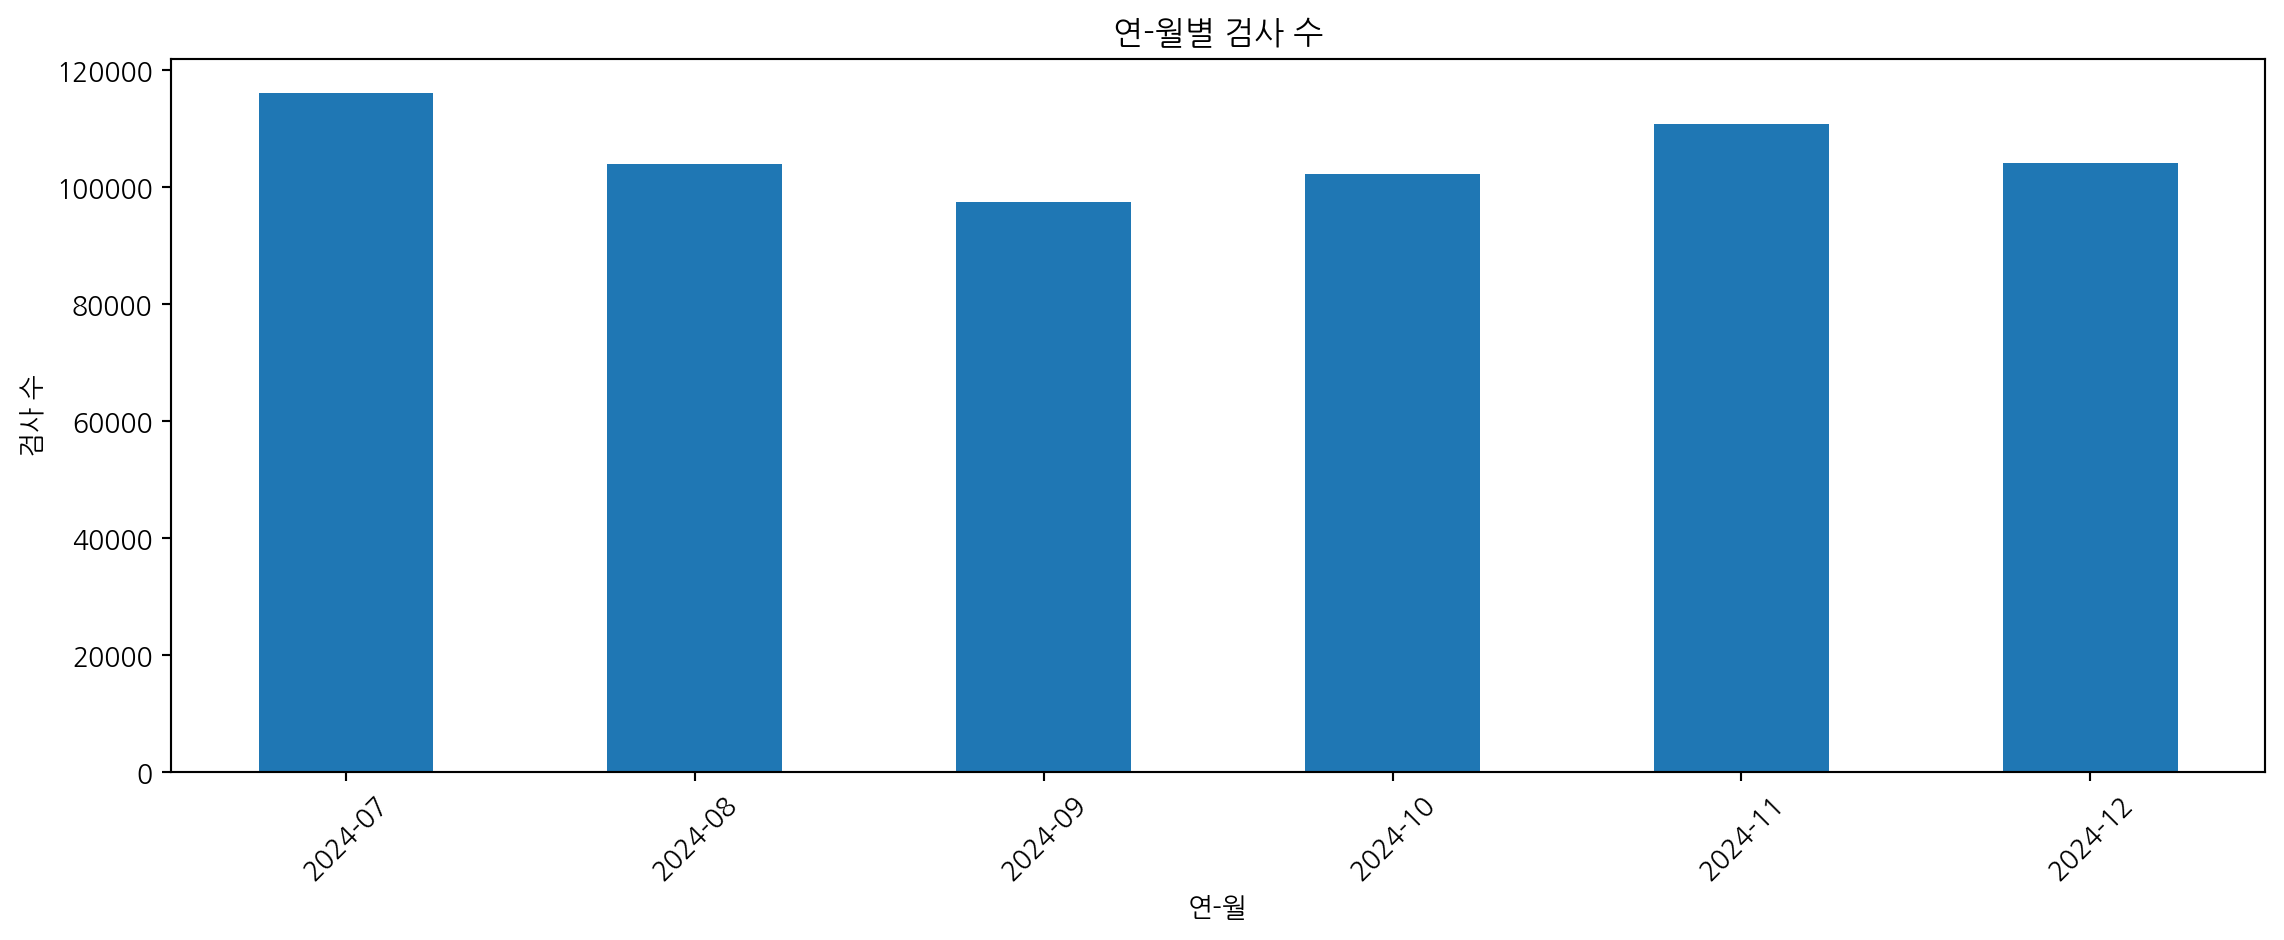

In [19]:
import matplotlib.pyplot as plt

monthly_counts = df2['연월'].value_counts().sort_index()

# 2. 연월별 검사 수 히스토그램 시각화
monthly_counts.plot(kind='bar', figsize=(12, 5))
plt.title('연-월별 검사 수')
plt.xlabel('연-월')
plt.ylabel('검사 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 함수 1

In [20]:
import pandas as pd
import plotly.express as px

def plot_top_institutions(df, date_col='검사일자', group_col='검사기관', top_n=5):
    # 1. 날짜 열 datetime 변환
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    df['연월'] = df[date_col].dt.to_period('M').astype(str)  # '2024-08' 형식 문자열

    # 2. 검사기관별 전체 건수 기준 상위 N개 추출
    top_insts = df[group_col].value_counts().nlargest(top_n).index

    # 3. 해당 기관만 필터링
    filtered = df[df[group_col].isin(top_insts)]

    # 4. 연월별 count 집계 (검사기관 × 연월)
    summary = filtered.groupby(['연월', group_col]).size().reset_index(name='건수')

    # 5. Plotly line plot (interactive)
    fig = px.line(summary,
                  x='연월',
                  y='건수',
                  color=group_col,
                  markers=True,
                  title=f'상위 {top_n} 검사기관의 월별 검사 건수',
                  labels={'연월': '연-월', '건수': '검사 수', group_col: '검사기관'},
                  hover_data={'연월': True, '건수': True, group_col: True}
                 )

    fig.update_layout(
        xaxis=dict(tickangle=45),
        hovermode='x unified',
        width=1000,
        height=500
    )

    fig.show()


In [21]:
# 사용 예시
plot_top_institutions(df, top_n=7)

- '(재)승강기안전기술연구원 서울지원'의 추세가 다른 검사기관들과 비교됨

### 함수 2

In [22]:
import pandas as pd
import plotly.graph_objects as go

def plot_top_institutions(df, date_col='검사일자', group_col='검사기관',
                          top_n=5, period_start=None, period_end=None):
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    df['연월'] = df[date_col].dt.to_period('M').astype(str)  # '2024-08' 형식 유지

    if period_start:
        df = df[df['연월'] >= period_start]
    if period_end:
        df = df[df['연월'] <= period_end]

    # 전체 건수 기준 상위 검사기관 추출
    top_groups = df[group_col].value_counts().nlargest(top_n)
    df = df[df[group_col].isin(top_groups.index)]

    # 월별 건수 요약
    summary = df.groupby(['연월', group_col]).size().reset_index(name='건수')

    # 그래프 생성
    fig = go.Figure()

    for group in top_groups.index:
        sub_df = summary[summary[group_col] == group]
        fig.add_trace(go.Scatter(
            x=sub_df['연월'],
            y=sub_df['건수'],
            mode='lines+markers',
            name=group,
            hovertemplate=(
                f'<b>검사기관: {group}</b><br>' +
                '연월: %{x}<br>검사 수: %{y}<extra></extra>'
            )
        ))

    fig.update_layout(
        title=f'상위 {top_n} 검사기관의 월별 검사 건수',
        xaxis_title='연월',
        yaxis_title='검사 수',
        xaxis_tickangle=0,
        xaxis=dict(type='category'),  # 날짜를 문자로 고정
        hovermode='closest',
        width=1000,
        height=500
    )

    fig.show()


In [23]:
# 사용 예시
plot_top_institutions(
    df,
    top_n=7,
    period_start='2024-07',
    period_end='2024-12'
)

### 함수 3

In [24]:
# 개선된 함수: 원하는 기관 직접 지정 기능 포함
def plot_top_institutions(df, date_col='검사일자', group_col='검사기관',
                          top_n=5, target_institutions=None,
                          period_start=None, period_end=None):
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    df['연월'] = df[date_col].dt.to_period('M').astype(str)

    # 1. 기간 필터링
    if period_start:
        df = df[df['연월'] >= period_start]
    if period_end:
        df = df[df['연월'] <= period_end]

    # 2. 기관 필터링
    if target_institutions is not None:
        target_list = target_institutions
    else:
        target_list = df[group_col].value_counts().nlargest(top_n).index.tolist()

    df = df[df[group_col].isin(target_list)]

    # 3. 연월별 집계
    summary = df.groupby(['연월', group_col]).size().reset_index(name='건수')

    # 4. 그래프 생성
    fig = go.Figure()

    for group in target_list:
        sub_df = summary[summary[group_col] == group]
        fig.add_trace(go.Scatter(
            x=sub_df['연월'],
            y=sub_df['건수'],
            mode='lines+markers',
            name=group,
            hovertemplate=(
                f'<b>검사기관: {group}</b><br>' +
                '연월: %{x}<br>검사 수: %{y}<extra></extra>'
            )
        ))

    fig.update_layout(
        title=f'{"사용자 지정" if target_institutions else f"상위 {top_n}"} 검사기관의 월별 검사 건수',
        xaxis_title='연월',
        yaxis_title='검사 수',
        xaxis_tickangle=0,
        xaxis=dict(type='category'),
        hovermode='closest',
        width=1000,
        height=500
    )

    fig.show()


In [25]:
# 사용 예시 1
plot_top_institutions(
    df,
    target_institutions=[
        '(재)승강기안전기술연구원 서울지원',
        '한국승강기안전공단 경기북부지사'
    ],
    period_start='2024-08',
    period_end='2024-12'
)

In [26]:
# 사용 예시 2
plot_top_institutions(df, top_n=5)

### 함수 4

In [27]:
# 함수: 특정 월의 일자별 검사 건수 시각화

def plot_daily_by_institution(df, year_month, date_col='검사일자', group_col='검사기관', top_n=5):
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    df['연월'] = df[date_col].dt.to_period('M').astype(str)

    # 1. 해당 연월 필터링
    df = df[df['연월'] == year_month]

    # 2. 전체 건수 기준 상위 검사기관 추출
    top_groups = df[group_col].value_counts().nlargest(top_n).index
    df = df[df[group_col].isin(top_groups)]

    # 3. 일자 및 요일 생성
    df['일자'] = df[date_col].dt.date
    df['요일'] = df[date_col].dt.day_name()  # Monday, Tuesday, ...

    # 4. 요약 테이블
    summary = df.groupby(['일자', '요일', group_col]).size().reset_index(name='건수')

    # 5. 그래프 생성
    fig = go.Figure()

    for group in top_groups:
        sub_df = summary[summary[group_col] == group]

        fig.add_trace(go.Scatter(
            x=sub_df['일자'].astype(str),
            y=sub_df['건수'],
            mode='lines+markers',
            name=group,
            customdata=sub_df[['요일']],
            hovertemplate=(
                f'<b>검사기관: {group}</b><br>' +
                '일자: %{x}<br>' +
                '요일: %{customdata[0]}<br>' +
                '검사 수: %{y}<extra></extra>'
            )
        ))

    fig.update_layout(
        title=f'{year_month} 일자별 검사 건수 (상위 {top_n} 기관)',
        xaxis_title='일자',
        yaxis_title='검사 수',
        xaxis_tickangle=45,
        xaxis=dict(type='category'),
        hovermode='closest',
        width=1000,
        height=500
    )

    fig.show()


In [28]:
# 사용 예시
plot_daily_by_institution(df, '2024-08', top_n=7)

### 함수 5

In [29]:
# 개선된 함수: 원하는 기관 직접 지정 기능 포함
import pandas as pd
import plotly.graph_objects as go

def plot_daily_by_institution(df, year_month, date_col='검사일자', group_col='검사기관',
                              top_n=5, target_institutions=None):
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    df['연월'] = df[date_col].dt.to_period('M').astype(str)

    # 1. 해당 월만 필터링
    df = df[df['연월'] == year_month]

    # 2. 검사기관 지정
    if target_institutions is not None:
        target_list = target_institutions
    else:
        target_list = df[group_col].value_counts().nlargest(top_n).index.tolist()

    df = df[df[group_col].isin(target_list)]

    # 3. 일자 및 요일 추출
    df['일자'] = df[date_col].dt.date
    df['요일'] = df[date_col].dt.day_name()

    # 4. 집계
    summary = df.groupby(['일자', '요일', group_col]).size().reset_index(name='건수')

    # 5. 그래프 생성
    fig = go.Figure()

    for group in target_list:
        sub_df = summary[summary[group_col] == group]

        fig.add_trace(go.Scatter(
            x=sub_df['일자'].astype(str),
            y=sub_df['건수'],
            mode='lines+markers',
            name=group,
            customdata=sub_df[['요일']],
            hovertemplate=(
                f'<b>검사기관: {group}</b><br>' +
                '일자: %{x}<br>' +
                '요일: %{customdata[0]}<br>' +
                '검사 수: %{y}<extra></extra>'
            )
        ))

    fig.update_layout(
        title=f'{year_month} 일자별 검사 건수 ({ "사용자 지정" if target_institutions else f"상위 {top_n} 기관"})',
        xaxis_title='일자',
        yaxis_title='검사 수',
        xaxis_tickangle=45,
        xaxis=dict(type='category'),
        hovermode='closest',
        width=1000,
        height=500
    )

    fig.show()


In [30]:
# 사용 예시 1
plot_daily_by_institution(
    df,
    year_month='2024-08',
    target_institutions=['(재)승강기안전기술연구원 서울지원', '한국승강기안전공단 서울북부지사']
)

In [31]:
# 사용 예시 2
plot_daily_by_institution(df, '2024-08', top_n=5)

## 4. (기술통계) 각 column의 기술통계 (평균값, 최대값, 최솟값, 최빈값, 분위수 등)

In [32]:
# 수치형 변수만 선택
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 통계 요약 저장용 리스트
stat_list = []

for col in numeric_cols:
    desc = df[col].describe()
    mode = df[col].mode(dropna=False).values[0]  # 최빈값 (여러 개 중 첫 번째 선택)
    mode_all = df[col].mode(dropna=False).tolist()  # 최빈값 리스트 형태로 저장

    stat_list.append({
        'Feature': col,
        'Count': desc['count'],
        'Mean': desc['mean'],
        'Std': desc['std'],
        'Min': desc['min'],
        '25%': desc['25%'],
        'Median (50%)': desc['50%'],
        '75%': desc['75%'],
        'Max': desc['max'],
        'Mode': mode,
        'Mode_all': mode_all
    })

# DataFrame으로 정리
stats_df = pd.DataFrame(stat_list)
stats_df

,Feature,Count,Mean,Std,Min,25%,Median (50%),75%,Max,Mode,Mode_all
0,검사결과이력조회코드,634630.0,4.213546e+07,1.873299e+07,4300001.0,30501554.0,44001818.5,56006944.75,79900109.0,13408948,"[13408948, 13409063, 15010874, 15712290, 15712..."
1,검사차수,634630.0,1.282875e+00,4.503966e-01,1.0,1.0,1.0,2.00,2.0,1,[1]


In [33]:
stats_df.loc[stats_df['Feature'] == '검사결과이력조회코드', 'Mode_all'].values

array([list([13408948, 13409063, 15010874, 15712290, 15712440, 15712441, 42901639, 42901640, 43005715, 70201335, 70201977])],
      dtype=object)

In [34]:
stats_df.loc[stats_df['Feature'] == '검사결과이력조회코드', 'Mode_all'].values[0]

[13408948,
 13409063,
 15010874,
 15712290,
 15712440,
 15712441,
 42901639,
 42901640,
 43005715,
 70201335,
 70201977]

In [35]:
stats_df.loc[stats_df['Feature'] == '검사결과이력조회코드', 'Mode_all'].values[0][0] # 첫번째 원소만

13408948

## 5. (상관관계) 상관관계 매트릭스

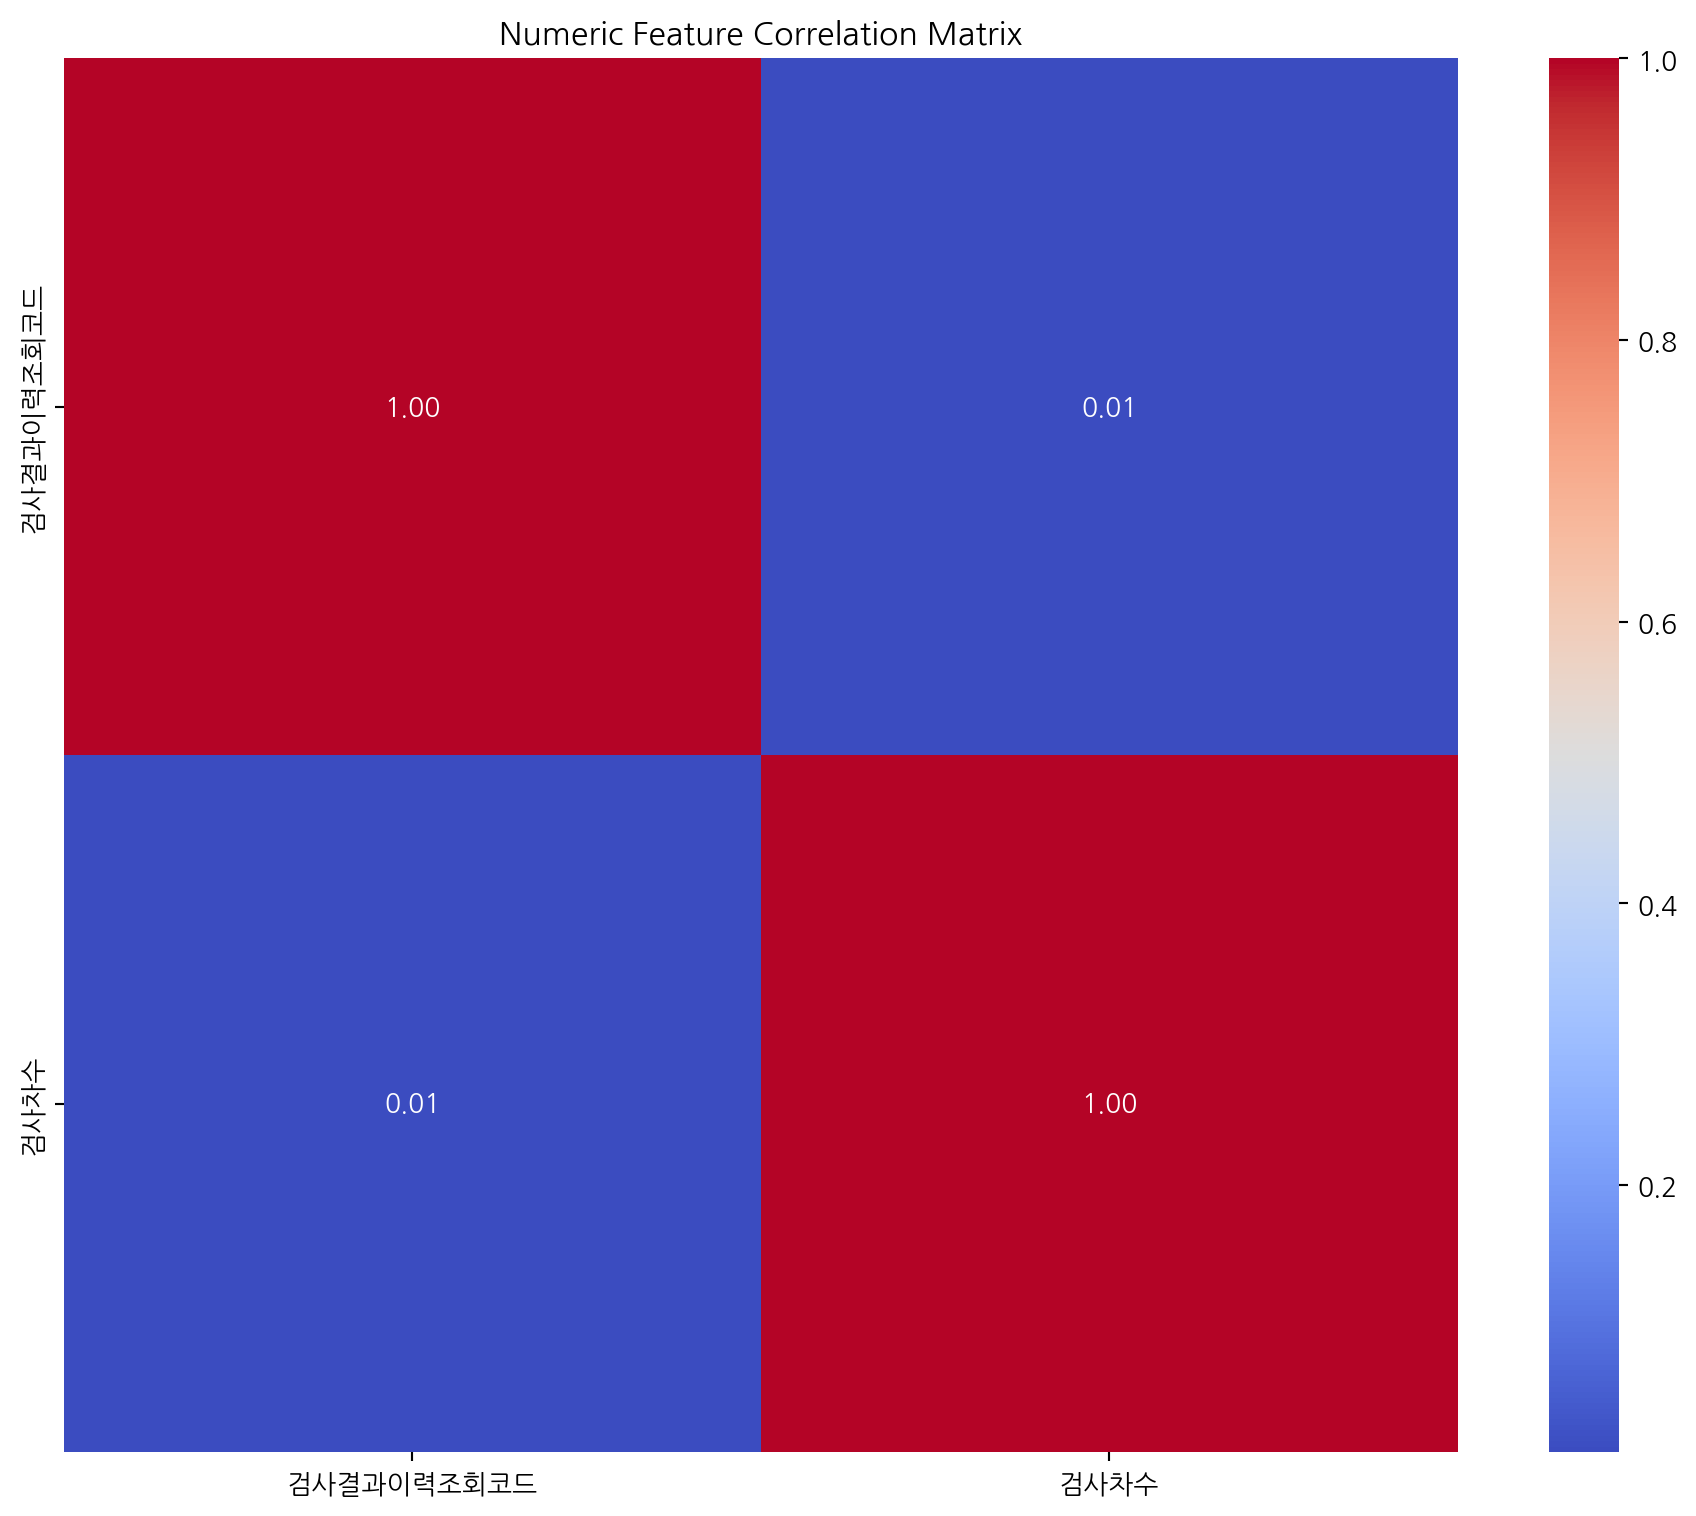

In [36]:
# 수치형 변수 간 상관관계 매트릭스

import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수만 선택
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 상관계수 계산
corr_matrix = numeric_df.corr()

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Numeric Feature Correlation Matrix")
plt.tight_layout()
plt.show()

- 당연히 두 변수는 상관 관계가 없음

## 6. (시각화) histogram, bar graph, box plot 등

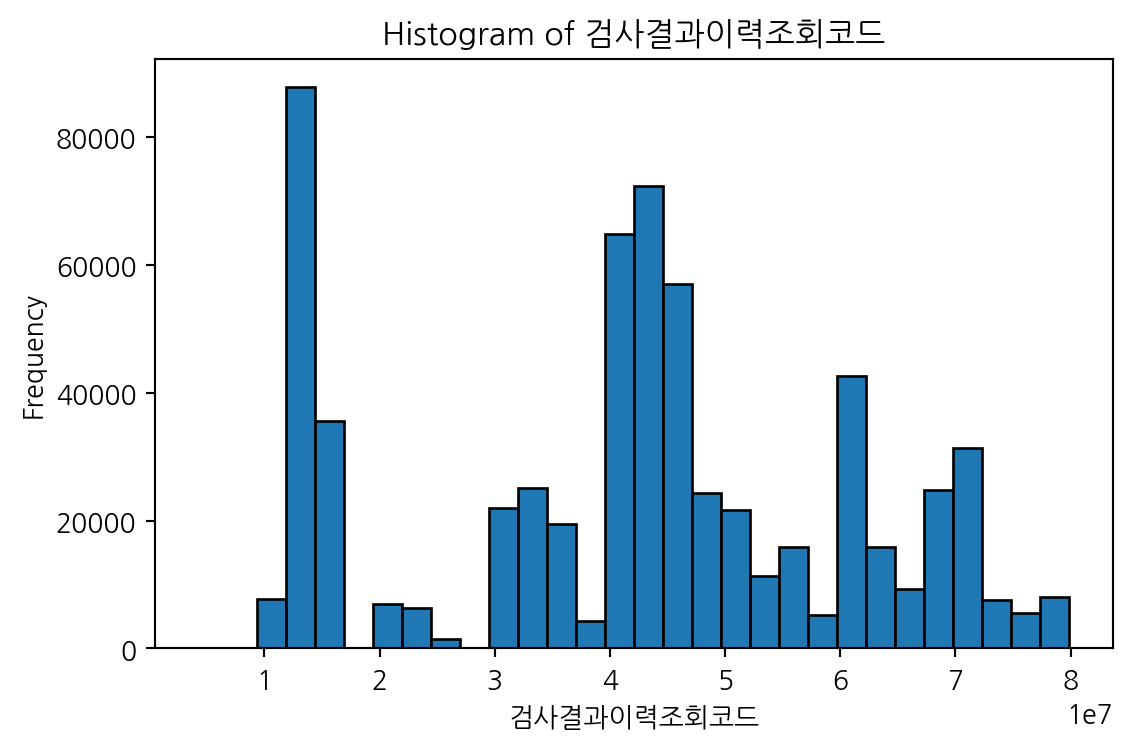

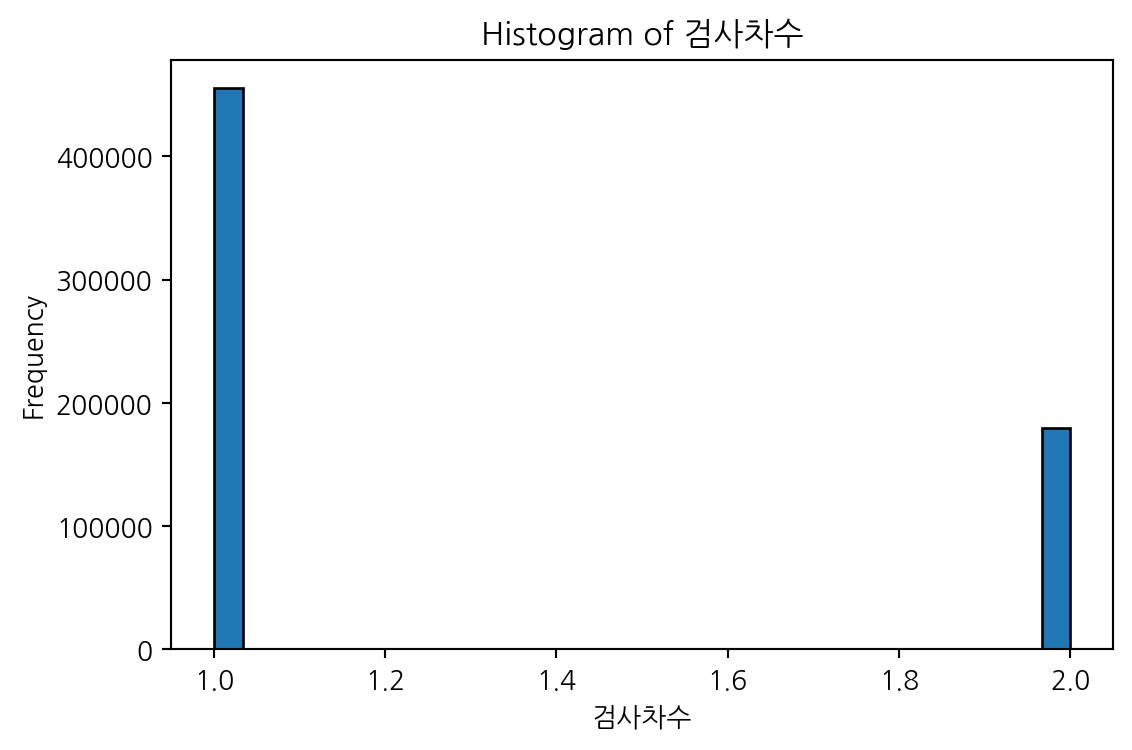

In [37]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 전체 수치형 변수에 대해 히스토그램 그리기
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col].dropna(), bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

- bins를 증가시키면

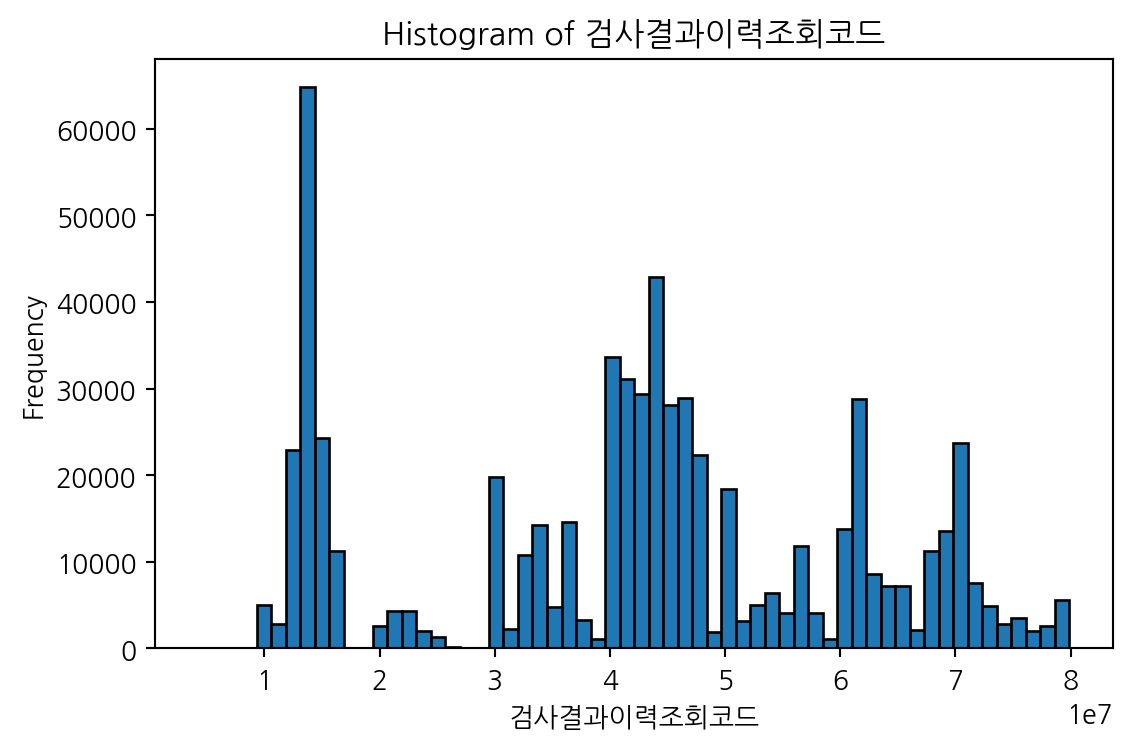

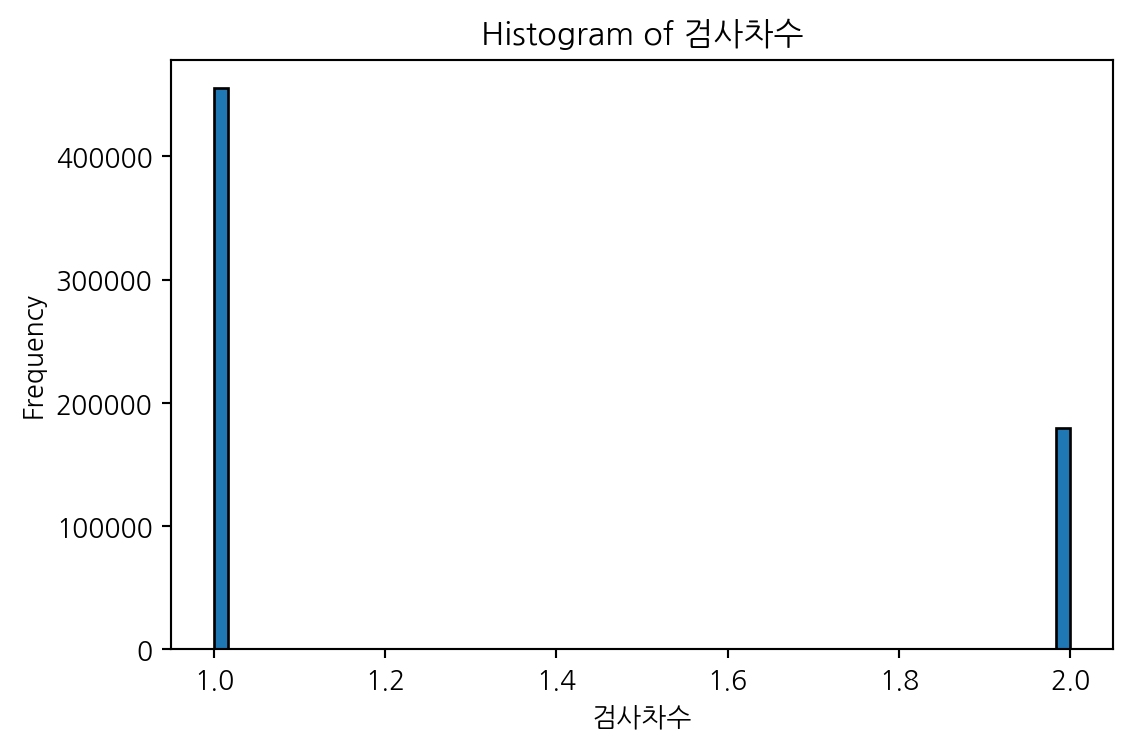

In [38]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 전체 수치형 변수에 대해 히스토그램 그리기
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col].dropna(), bins=60, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [39]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# cat_cols = df.select_dtypes(include=['object']).columns

# # 전체 범주형 변수에 대해 히스토그램 그리기

# for col in cat_cols:
#     plt.figure(figsize=(6, 4))
#     ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, color='salmon')

#     total = len(df)

#     for p in ax.patches:
#         count = int(p.get_height())
#         percent = 100 * count / total
#         label = f'{count} ({percent:.1f}%)'

#         # 텍스트 위치: 막대 안쪽 상단 (중앙 정렬)
#         ax.annotate(label,
#                     (p.get_x() + p.get_width() / 2., p.get_height() * 0.95),
#                     ha='center', va='top',
#                     fontsize=9, color='white', weight='bold')

#     plt.title(f'Bar Graph of {col} (Count + Ratio)')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

- 의미가 없어서 실행 X (날짜 데이터를 제외하고 그려도 알아보기 어려움)

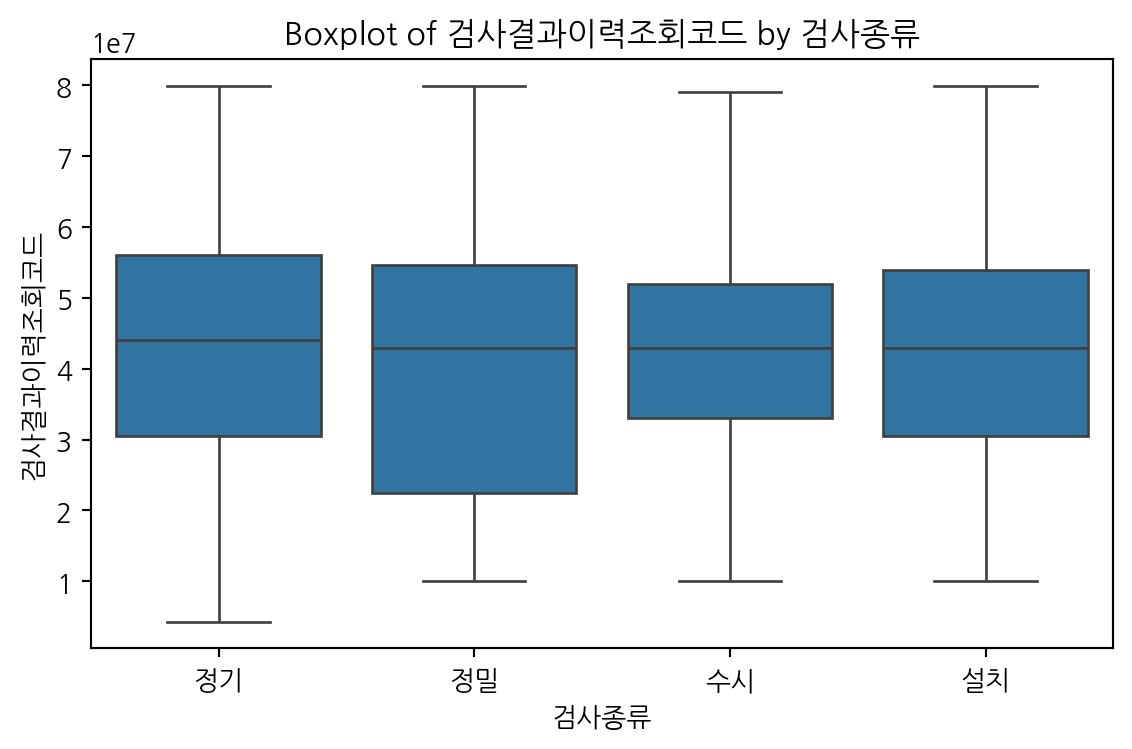

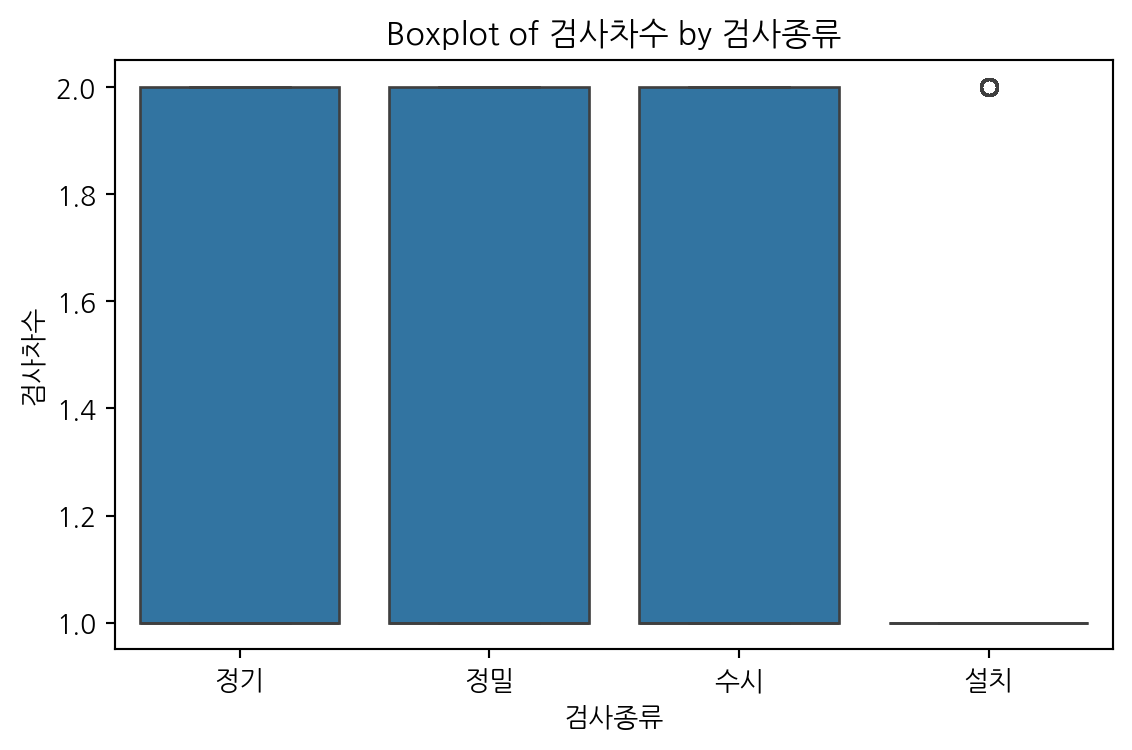

In [40]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 특정 변수에 따른 수치형 변수 분포 비교
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='검사종류', y=col)
    plt.title(f'Boxplot of {col} by 검사종류')
    plt.tight_layout()
    plt.show()

- '검사종류'가 '설치'이면 대부분 '검사차수'가 1차?
- '검사차수'는 값이 1 또는 2 뿐이라 상자그림이 큰 의미를 가지지 않음

In [41]:
# # 특정 변수 중 특정 값들에 따른 수치형 변수들 분포 비교
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 파라미터 설정
# group_col = '검사종류'  # 비교할 범주형 변수
# target_values = ['설치']  # 특정 값들
# numeric_cols = ['검사차수']  # 수치형 변수 목록

# # 필터링된 데이터프레임
# filtered_df = df[df[group_col].isin(target_values)]

# # 반복해서 boxplot 그리기
# for col in numeric_cols:
#     plt.figure(figsize=(6, 4))
#     sns.boxplot(data=filtered_df, x=group_col, y=col)
#     plt.title(f'Boxplot of {col} by {group_col} ({", ".join(target_values)})')
#     plt.tight_layout()
#     plt.show()

In [42]:
# 카테고리 + 수치형 변수 조합 분포표
# 1. 개수 집계
count_df = df.groupby(['검사종류', '검사차수']).size().reset_index(name='Count')

# 2. 검사종류별 총합 기준 비율 계산
count_df['비율 (%)'] = count_df.groupby('검사종류')['Count'].transform(lambda x: (x / x.sum()) * 100).round(2)

# 3. 확인
print(count_df)

  검사종류  검사차수   Count  비율 (%)
0   설치     1   26310   79.28
1   설치     2    6875   20.72
2   수시     1   11108   62.22
3   수시     2    6745   37.78
4   정기     1  368629   71.92
5   정기     2  143918   28.08
6   정밀     1   49062   69.06
7   정밀     2   21983   30.94


- 모든 검사종류에서 1차 검사가 약 60~80% 정도를 차지함
    - 대부분의 검사는 1차에서 마무리된다는 시사점
- 정기 검사는 Count가 월등히 높으므로 주된 검사 유형이라는 정량적 증거
- 수시 검사에서 2차 비율 37.78%는 상대적으로 다른 유형보다 2차 재검이 많은 것처럼 보임
    - 수시검사는 1차에서 문제가 생겨 재검 비율이 높은 유형일 수 있음
- 나중에 이 데이터를 이전의 승강기 검사 결과들과 합치고 사고 데이터와 같이 분석하면 좋을 것 같음

## 7. (교차표) 범주형 변수 간의 관계

In [43]:
# '검사종류'에 따른 '검사결과' 비율
print("=== 검사종류 vs 검사결과 ===")
ratio = df.groupby('검사종류')['검사결과'].value_counts(normalize=True).unstack()
ratio.head()

=== 검사종류 vs 검사결과 ===


검사결과,보완(서류검사),보완(현장검사),보완후불합격,보완후합격,불합격,조건부합격(12개월이하/서류검사),조건부합격(12개월이하/현장검사),조건부합격(1개월/서류검사),조건부합격(1개월/현장검사),조건부합격(2개월/서류검사),조건부합격(2개월/현장검사),조건부합격(차기안전검사),조건부합격(현장시정조치),조건후불합격,조건후합격,차기안전검사,합격
검사종류,,,,,,,,,,,,,,,,,
설치,0.002682,0.203586,0.003737,0.203435,0.048486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.538074
수시,NaN,NaN,NaN,NaN,0.021845,0.000056,0.000448,0.003529,0.119980,0.004033,0.247801,NaN,0.012267,0.004425,0.373159,0.000224,0.212233
정기,NaN,NaN,NaN,NaN,0.002950,0.000634,0.001155,0.171274,0.000611,0.113217,0.000496,0.000708,0.040597,0.000993,0.278800,0.000997,0.387568
정밀,NaN,NaN,NaN,NaN,0.009290,0.000521,0.000845,0.097150,0.001548,0.208727,0.025181,0.003364,0.049870,0.021198,0.251320,0.036906,0.294081


- 각 **검사종류**별(기준축) 검사결과 비율
- 행 기준 해석: 이 검사종류에서 어떤 결과가 나왔는가?
- 사용 목적: 검사종류별 합격률/불합격률 등

In [44]:
pd.crosstab(df['검사결과'], df['검사종류'], normalize='index')

검사종류,설치,수시,정기,정밀
검사결과,,,,
보완(서류검사),1.000000,0.000000,0.000000,0.000000
보완(현장검사),1.000000,0.000000,0.000000,0.000000
보완후불합격,1.000000,0.000000,0.000000,0.000000
보완후합격,1.000000,0.000000,0.000000,0.000000
불합격,0.385759,0.093503,0.362503,0.158235
조건부합격(12개월이하/서류검사),0.000000,0.002755,0.895317,0.101928
조건부합격(12개월이하/현장검사),0.000000,0.012121,0.896970,0.090909
조건부합격(1개월/서류검사),0.000000,0.000665,0.926492,0.072844
조건부합격(1개월/현장검사),0.000000,0.835088,0.122027,0.042885


- 각 **검사결과**별(기준축) 검사종류 비율
- 행 기준 해석: 이 검사결과는 어떤 검사종류에서 나왔는가?
- 사용 목적: 특정 결과가 주로 어느 검사에서 발생하는지 등

### 함수 1

In [45]:
def grouped_ratio_table(df, group_col, target_col, normalize=True):
    """
    group_col 기준으로 target_col의 비율(또는 건수)을 cross-tab 형태로 반환

    Parameters:
    - df: DataFrame
    - group_col: 그룹 기준 변수 (ex: '지역')
    - target_col: 비율을 계산할 대상 변수 (ex: '승강기종류')
    - normalize: True면 비율, False면 건수

    Returns:
    - DataFrame: 행 = group_col, 열 = target_col
    """
    grouped = (
        df.groupby(group_col)[target_col]
        .value_counts(normalize=normalize)
        .unstack()
    )
    return grouped

In [46]:
# 비율 사용 예시
print("=== 검사당시승강기구분 vs 검사결과 비율 ===")
grouped_ratio_table(df, '검사당시승강기구분', '검사결과')

=== 검사당시승강기구분 vs 검사결과 비율 ===


검사결과,보완(서류검사),보완(현장검사),보완후불합격,보완후합격,불합격,조건부합격(12개월이하/서류검사),조건부합격(12개월이하/현장검사),조건부합격(1개월/서류검사),조건부합격(1개월/현장검사),조건부합격(2개월/서류검사),조건부합격(2개월/현장검사),조건부합격(차기안전검사),조건부합격(현장시정조치),조건후불합격,조건후합격,차기안전검사,합격
검사당시승강기구분,,,,,,,,,,,,,,,,,
경사형엘리베이터,NaN,0.083333,NaN,0.083333,0.166667,NaN,NaN,0.083333,NaN,NaN,NaN,NaN,0.166667,0.083333,0.083333,NaN,0.250000
무빙워크,NaN,0.007334,NaN,0.006810,0.004976,0.018334,0.004191,0.129387,0.010739,0.061289,0.003667,0.002619,0.025668,0.005238,0.194081,0.032478,0.493190
소형화물용엘리베이터,NaN,0.003342,NaN,0.003008,0.020388,NaN,NaN,0.109960,0.003008,0.007687,0.001337,NaN,0.048463,0.001337,0.122326,NaN,0.679144
에스컬레이터,0.000182,0.019717,0.000182,0.018123,0.007650,0.001366,0.000683,0.155822,0.007513,0.033742,0.003279,0.001594,0.070124,0.002869,0.198124,0.003370,0.475661
엘리베이터,0.000134,0.010340,0.000177,0.010405,0.006355,0.000436,0.001043,0.149623,0.003891,0.119187,0.010569,0.000923,0.037640,0.003324,0.267978,0.004872,0.373103
주택형엘리베이터,0.006061,0.048485,0.003030,0.051515,0.018182,NaN,NaN,0.139394,0.003030,0.009091,0.003030,NaN,0.042424,0.003030,0.163636,NaN,0.509091
휠체어리프트,0.000887,0.013310,0.005324,0.010204,0.035936,NaN,NaN,0.087400,0.000887,0.012422,NaN,NaN,0.028394,NaN,0.106921,NaN,0.698314


- 어떤 승강기 종류가 불합격률이 높은가 → 설계/유지관리 문제 포착 가능

In [47]:
# # 건수 사용 예시
# print("=== 검사당시승강기구분 vs 검사결과 건수 ===")
# grouped_ratio_table(df, '검사당시승강기구분', '검사결과', normalize=False)

### 함수 2

In [48]:
def filter_crosstab(df, group_col, target_col,
                    row_values=None, col_values=None,
                    normalize=True):
    """
    전체 교차표 생성 후, 특정 행(row)/열(column)만 필터링
    
    Parameters:
    - df: 전체 DataFrame
    - group_col: 행 기준 (예: '지역')
    - target_col: 열 기준 (예: '승강기종류')
    - row_values: group_col 중 보고 싶은 값 리스트
    - col_values: target_col 중 보고 싶은 값 리스트
    - normalize: True면 비율, False면 건수
    
    Returns:
    - 필터된 교차표 DataFrame
    """
    table = df.groupby(group_col)[target_col].value_counts(normalize=normalize).unstack()

    if row_values is not None:
        table = table.loc[table.index.intersection(row_values)]
    if col_values is not None:
        table = table.loc[:, table.columns.intersection(col_values)]
        
    return table

In [49]:
# 비율 사용 예시
filter_crosstab(df,
                group_col='검사당시승강기종류',
                target_col='검사결과',
                row_values=['승객용', '화물용', '소방구조용', '장애인용', '에스컬레이터', '승객용(장애인겸용)'],
                col_values=['합격', '조건부합격', '불합격', '보완후합격', '보완후불합격'],
                normalize=True)

검사결과,보완후불합격,보완후합격,불합격,합격
검사당시승강기종류,,,,
소방구조용,NaN,0.004475,0.003088,0.312795
승객용,0.000127,0.011382,0.006246,0.415503
승객용(장애인겸용),NaN,0.090909,0.090909,0.272727
에스컬레이터,0.000182,0.018123,0.007650,0.475661
장애인용,0.000345,0.015592,0.007523,0.394988
화물용,0.000152,0.018052,0.020252,0.376972


In [50]:
# 건수 사용 예시
filter_crosstab(df,
                group_col='검사당시승강기종류',
                target_col='검사결과',
                row_values=['승객용', '화물용', '소방구조용', '장애인용', '에스컬레이터', '승객용(장애인겸용)'],
                col_values=['합격', '조건부합격', '불합격', '보완후합격', '보완후불합격'],
                normalize=False)

검사결과,보완후불합격,보완후합격,불합격,합격
검사당시승강기종류,,,,
소방구조용,NaN,129.0,89.0,9016.0
승객용,28.0,2502.0,1373.0,91333.0
승객용(장애인겸용),NaN,1.0,1.0,3.0
에스컬레이터,4.0,398.0,168.0,10446.0
장애인용,53.0,2396.0,1156.0,60697.0
화물용,2.0,238.0,267.0,4970.0


### 함수 3

In [51]:
def merged_ratio_count_table(df, group_col, target_col,
                              row_values=None, col_values=None,
                              sort_mode='suffix-first',
                              order=['비율', '건수']):
    """
    비율 교차표와 건수 교차표를 병합하고 선택한 행/열만 필터링, 열 순서 정렬까지 하나의 함수로 처리

    Parameters:
    - df: DataFrame
    - group_col: 행 기준 변수 (예: '지역')
    - target_col: 열 기준 변수 (예: '승강기종류')
    - row_values: 선택할 행 인덱스 (None이면 전체)
    - col_values: 선택할 열 값 (None이면 전체)
    - sort_mode: 열 정렬 방식 - 'suffix-first' 또는 'prefix-first'
        - 'suffix-first': 항목별로 비율 → 건수 순서로 정렬  
          예: ['승객용_비율', '승객용_건수', '화물용_비율', '화물용_건수']
        - 'prefix-first': 비율 열들을 모두 먼저, 그다음 건수 열들을 정렬  
          예: ['승객용_비율', '화물용_비율', '승객용_건수', '화물용_건수']
    - order: 접미사 순서 지정 (허용된 값만 가능: ['비율', '건수'] 또는 ['건수', '비율'])

    Returns:
    - 병합된 정렬된 교차표 DataFrame
    """

    from collections import defaultdict

    # === Step 0. order 유효성 검사 ===
    if set(order) != {'비율', '건수'} or len(order) != 2:
        raise ValueError("order must be exactly ['비율', '건수'] or ['건수', '비율']")

    # === Step 1. 전체 교차표 생성 (비율, 건수) ===
    ratio = df.groupby(group_col)[target_col].value_counts(normalize=True).unstack()
    count = df.groupby(group_col)[target_col].value_counts(normalize=False).unstack()

    # === Step 2. 열 필터링 ===
    if col_values is not None:
        ratio = ratio.loc[:, ratio.columns.intersection(col_values)]
        count = count.loc[:, count.columns.intersection(col_values)]

    # === Step 3. 열 이름 변경 ===
    ratio.columns = [f"{col}_비율" for col in ratio.columns]
    count.columns = [f"{col}_건수" for col in count.columns]

    # === Step 4. 병합 ===
    merged = pd.concat([ratio, count], axis=1)

    # === Step 5. 열 순서 재정렬 ===
    prefix_groups = defaultdict(dict)
    for col in merged.columns:
        if '_' in col:
            prefix, suffix = col.rsplit('_', 1)
            prefix_groups[prefix][suffix] = col

    ordered_cols = []
    if sort_mode == 'suffix-first':
        for prefix in sorted(prefix_groups):
            for suffix in order:
                if suffix in prefix_groups[prefix]:
                    ordered_cols.append(prefix_groups[prefix][suffix])
    elif sort_mode == 'prefix-first':
        for suffix in order:
            for prefix in sorted(prefix_groups):
                if suffix in prefix_groups[prefix]:
                    ordered_cols.append(prefix_groups[prefix][suffix])
    else:
        raise ValueError("sort_mode must be 'suffix-first' or 'prefix-first'")

    merged = merged[ordered_cols]

    # === Step 6. 행 필터링 ===
    if row_values is not None:
        merged = merged.loc[merged.index.intersection(row_values)]

    return merged

In [52]:
# 사용 예시
merged_ratio_count_table(
    df,
    group_col='검사기관',
    target_col='검사결과',
    row_values=[
    "(재)승강기안전기술연구원 서울지원",
    "한국승강기안전공단 경기북부지사",
    "한국승강기안전공단 고양파주지사",
    "한국승강기안전공단 화성오산지사",
    "한국승강기안전공단 대전지사",
    "한국승강기안전공단 충북지사",
    "한국승강기안전공단 성남지사"
    ],
    col_values=['합격', '조건부합격', '불합격', '보완후합격', '보완후불합격'],
    sort_mode='prefix-first',
    order=['비율', '건수']
)

,보완후불합격_비율,보완후합격_비율,불합격_비율,합격_비율,보완후불합격_건수,보완후합격_건수,불합격_건수,합격_건수
검사기관,,,,,,,,
(재)승강기안전기술연구원 서울지원,NaN,NaN,0.002644,0.396316,NaN,NaN,63.0,9445.0
한국승강기안전공단 경기북부지사,0.000079,0.009148,0.005165,0.210757,2.0,232.0,131.0,5345.0
한국승강기안전공단 고양파주지사,0.000248,0.012813,0.007549,0.286551,5.0,258.0,152.0,5770.0
한국승강기안전공단 대전지사,0.000110,0.015049,0.004888,0.426704,2.0,274.0,89.0,7769.0
한국승강기안전공단 성남지사,0.000118,0.009091,0.009209,0.384652,2.0,154.0,156.0,6516.0
한국승강기안전공단 충북지사,0.000058,0.012468,0.005277,0.437486,1.0,215.0,91.0,7544.0
한국승강기안전공단 화성오산지사,0.000415,0.022175,0.008182,0.303925,7.0,374.0,138.0,5126.0


# 3. Data 전처리

## 1. 결측치 처리

- 필요시 할 예정

## 2. 이상치 처리

- 필요시 할 예정

## 3. 동일값 처리

In [53]:
df['검사당시승강기형식'].unique()

array(['권상식', '유압식', '스텝식', '유압식 ', '팔레트식', '가이드로프식', '마찰견인식', '포지티브식',
       '로프현수식', '스크류-너트식', '체인현수식', '벨트식', '체인식  ', '랙-피니언식', '체인식'],
      dtype=object)

In [54]:
df['검사당시승강기형식'].value_counts()

검사당시승강기형식
권상식        592885
스텝식         21961
유압식         14545
팔레트식         3789
스크류-너트식       492
가이드로프식        309
포지티브식         202
유압식           177
마찰견인식         130
로프현수식          86
벨트식            29
체인식            19
체인식             3
체인현수식           2
랙-피니언식          1
Name: count, dtype: int64

In [55]:
df['검사당시승강기형식'].str.strip().unique()

array(['권상식', '유압식', '스텝식', '팔레트식', '가이드로프식', '마찰견인식', '포지티브식', '로프현수식',
       '스크류-너트식', '체인현수식', '벨트식', '체인식', '랙-피니언식'], dtype=object)

In [56]:
df['검사당시승강기형식'].str.strip().value_counts()

검사당시승강기형식
권상식        592885
스텝식         21961
유압식         14722
팔레트식         3789
스크류-너트식       492
가이드로프식        309
포지티브식         202
마찰견인식         130
로프현수식          86
벨트식            29
체인식            22
체인현수식           2
랙-피니언식          1
Name: count, dtype: int64

In [57]:
# df['검사당시승강기형식'] = df['검사당시승강기형식'].str.strip()

# 참고 자료

## 1.

승강기 형식은 구동 방식과 구조에 따라 다양한 형태로 나뉩니다. 아래는 각 형식에 대한 간단한 설명입니다:

1. **권상식**: 전동기를 이용하여 와이어 로프를 감거나 풀어 승강기를 이동시키는 방식입니다. 주로 고층 건물에서 사용됩니다.

2. **유압식**: 유압 실린더를 이용하여 승강기를 상승시키며, 중소형 건물에 적합합니다.

3. **스텝식**: 일정한 간격으로 정지하는 방식으로, 주로 에스컬레이터나 무빙워크에 적용됩니다.

4. **팔레트식**: 화물 운반용으로, 팔레트를 이용하여 물품을 승강시키는 방식입니다.

5. **가이드로프식**: 승강기의 이동을 안내하는 로프를 사용하는 방식으로, 안정성을 높입니다.

6. **마찰견인식**: 마찰력을 이용하여 로프를 견인하는 방식으로, 고층 건물에 적합합니다.

7. **포지티브식**: 기계적인 연결을 통해 직접 승강기를 이동시키는 방식으로, 정확한 위치 제어가 가능합니다.

8. **로프현수식**: 로프에 승강기를 매달아 이동시키는 방식으로, 일반적인 엘리베이터에서 사용됩니다.

9. **스크류-너트식**: 스크류와 너트를 이용하여 승강기를 이동시키는 방식으로, 정밀한 제어가 가능합니다.

10. **체인현수식**: 체인을 이용하여 승강기를 매달아 이동시키는 방식으로, 내구성이 높습니다.

11. **벨트식**: 벨트를 이용하여 승강기를 이동시키는 방식으로, 소음이 적고 유지보수가 용이합니다.

12. **체인식**: 체인을 이용하여 승강기를 이동시키는 방식으로, 강한 인장력을 제공합니다.

13. **랙-피니언식**: 기어와 랙을 이용하여 승강기를 이동시키는 방식으로, 경사면에서도 사용 가능합니다.

## 2.

승강기의 세부 형식은 구동 방식, 설치 환경, 용도에 따라 다양하게 분류됩니다. 아래는 주어진 목록에 대한 간단한 설명입니다:

---

> 전기적 구동 방식

1. **VVVF (Variable Voltage Variable Frequency)**
   전압과 주파수를 가변적으로 조절하여 모터의 속도와 토크를 제어하는 방식으로, 승강기의 부드러운 가속과 감속을 가능하게 하여 승차감을 향상시키고 에너지 효율성을 높입니다.&#x20;

2. **교류 (AC)**
   교류 전원을 사용하는 모터로 구동되는 방식으로, 유지보수가 간편하고 비용 효율적이며, 현대 승강기에서 널리 사용됩니다.

3. **직류기어 (DC Geared)**
   기어박스를 통해 모터의 회전력을 전달하는 방식으로, 중저속 승강기에 적합하며, 유지보수가 필요합니다.

4. **직류무기어 (DC Gearless)**
   기어 없이 모터와 드라이브 풀리를 직접 연결하는 방식으로, 고속 운행이 가능하며, 고층 건물에 적합합니다.&#x20;

---

> 설치 환경 및 구조에 따른 분류

5. **수직형 LIFT (4m 이하)**
   4미터 이하의 높이를 이동하는 리프트로, 주로 휠체어 사용자나 소형 화물 운반에 사용됩니다.

6. **수직형 LIFT (4m 초과)**
   4미터를 초과하는 높이를 이동하는 리프트로, 상업용 또는 산업용으로 사용되며, 안전성과 구조적 안정성이 중요합니다.

7. **경사형 LIFT**
   경사진 레일을 따라 이동하는 리프트로, 지형의 경사를 따라 설치되며, 주로 언덕이나 계단이 있는 장소에서 사용됩니다.&#x20;

---

이러한 세부 형식은 건물의 구조, 용도, 사용자 요구사항에 따라 선택되며, 각각의 방식은 특정한 장점과 제한사항을 가지고 있습니다.